# A linear regression example
$ y = wx + b$ <br>
$w=3, \, b=10 $


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


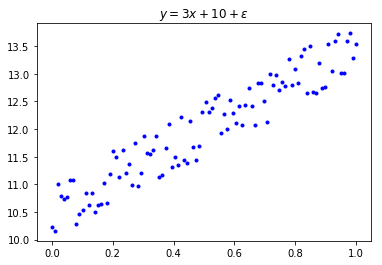

In [2]:
# --------------------------------generate data-------------------------------------
x_in = np.linspace(0, 1, 100)
y_true = 3*x_in + 10 + np.random.rand(len(x_in))

plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()




### $ (1)\; \hat y_i = wx_i + b $
### $ (2)\; MSE = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 $

## Three steps for training
1. Build the network
2. Compute the loss
3. Minimize the loss by using gradient descent

In [3]:
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[100], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[100], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w1, inputs), b1, name='y_pred')  # y = w1*input + b1 --- (1)

# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

![title](pics/ex3-1.PNG)

In [4]:
y_pred

<tf.Tensor 'y_pred:0' shape=(100,) dtype=float32>

In [5]:
pprint(tf.global_variables())

[<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


In [6]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(500):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out = sess.run(y_pred, feed_dict={inputs: x_in})

-----start training-----
step:   0, weight: 1.719, bias: 2.351
step:  25, weight: 4.724, bias: 9.578
step:  50, weight: 4.245, bias: 9.841
step:  75, weight: 3.902, bias: 10.025
step: 100, weight: 3.656, bias: 10.156
step: 125, weight: 3.482, bias: 10.250
step: 150, weight: 3.357, bias: 10.317
step: 175, weight: 3.268, bias: 10.365
step: 200, weight: 3.204, bias: 10.399
step: 225, weight: 3.159, bias: 10.423
step: 250, weight: 3.127, bias: 10.440
step: 275, weight: 3.104, bias: 10.453
step: 300, weight: 3.087, bias: 10.461
step: 325, weight: 3.075, bias: 10.468
step: 350, weight: 3.067, bias: 10.472
step: 375, weight: 3.061, bias: 10.475
step: 400, weight: 3.057, bias: 10.478
step: 425, weight: 3.054, bias: 10.479
step: 450, weight: 3.051, bias: 10.481
step: 475, weight: 3.050, bias: 10.481


In [7]:
pprint(tf.global_variables())

[<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


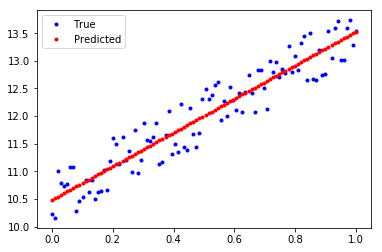

In [8]:
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

![title](pics/ex3-2.PNG)

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

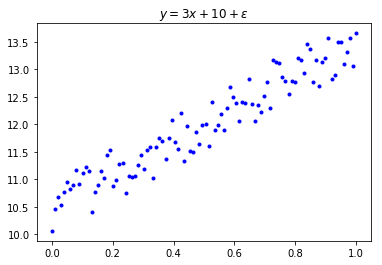

In [10]:
# --------------------------------generate data-------------------------------------
x = np.linspace(0, 1, 100)
y_true = 3*x + 10 + np.random.rand(len(x))

plt.plot(x, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()

In [11]:
tf.reset_default_graph()
x_in = tf.placeholder(name="x_in", dtype=tf.float32, shape = [100])
y_label = tf.placeholder(name='y_label', dtype=tf.float32, shape = [100])

w = tf.Variable([0.5,0.5],name='w', dtype=tf.float32)

y_preds = x_in * w[0] + w[1]

loss = tf.reduce_mean(tf.square(y_preds - y_label), name = 'mse')

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1)
train_ops = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(500):
        sess.run(train_ops, feed_dict={x_in:x, y_label:y_true})
        if step % 25 == 0:
            print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w[0]), sess.run(w[1])))
    y_out = sess.run(y_preds, feed_dict={x_in: x})


step:   0, weight: 1.666, bias: 2.748
step:  25, weight: 4.538, bias: 9.659
step:  50, weight: 4.080, bias: 9.911
step:  75, weight: 3.751, bias: 10.087
step: 100, weight: 3.516, bias: 10.213
step: 125, weight: 3.349, bias: 10.302
step: 150, weight: 3.229, bias: 10.366
step: 175, weight: 3.144, bias: 10.412
step: 200, weight: 3.083, bias: 10.445
step: 225, weight: 3.040, bias: 10.468
step: 250, weight: 3.009, bias: 10.485
step: 275, weight: 2.987, bias: 10.496
step: 300, weight: 2.971, bias: 10.505
step: 325, weight: 2.960, bias: 10.511
step: 350, weight: 2.952, bias: 10.515
step: 375, weight: 2.946, bias: 10.518
step: 400, weight: 2.942, bias: 10.520
step: 425, weight: 2.939, bias: 10.522
step: 450, weight: 2.937, bias: 10.523
step: 475, weight: 2.936, bias: 10.524


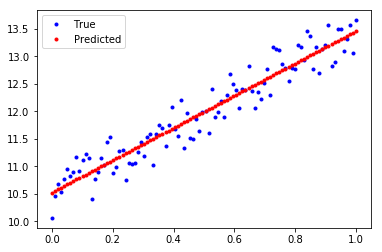

In [13]:
plt.plot(x, y_true, 'b.', label='True')
plt.plot(x, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

# Practice
$ y = w_1x^2 + w_2x + b$ <br>
$ w_1=6, \, w_2=-4, \, b=1 $

In [ ]:
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

plt.plot(x_in, y_true, 'b.')
plt.show()